# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration and Cleaning

### Gather basic information about the data

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
for column in df0.columns:
    df0.rename(columns={column:column.lower()}, inplace=True)
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
df0.rename(columns={'time_spend_company': 'tenure'}, inplace=True)

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
df0.duplicated().sum()

3008

In [10]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df1.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

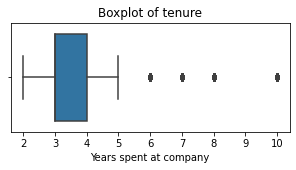

In [13]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df1['tenure'])
plt.xlabel('Years spent at company')
plt.title('Boxplot of tenure')
plt.show()

In [14]:
q3 = df1['tenure'].quantile(0.75)
q1 = df1['tenure'].quantile(0.25)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
print('Number of outliers:', (df1['tenure'] > upper_limit).sum())

Number of outliers: 824


The main stakeholder is the HR department Salifort Motors. The aim of the project is to deterine which variables have the most impact on employee retention and develop a model to predict whether an employee is likely to leave Salifort Motors. The tenure variable has 824 outliers on the upper limit which may need to be cleaned based on the model implemented.

# Data Analysis

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




In [15]:
print(df1['left'].value_counts())
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Text(0.5, 1.0, 'Distribution of number of projects')

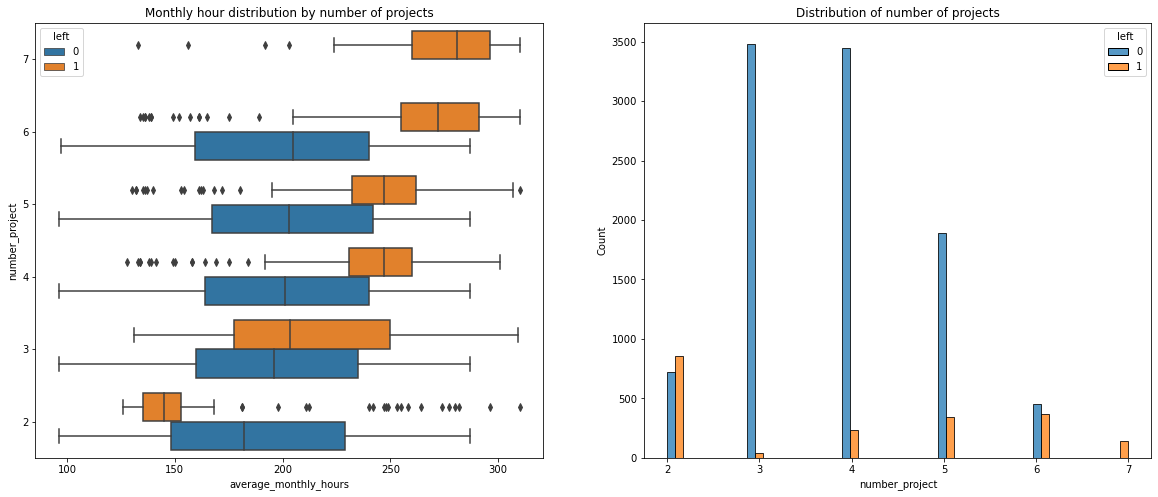

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hour distribution by number of projects')

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of number of projects')

On average, employees who left the company worked more monthly hours with the exception of the group of employees who worked on 2 projects. This could be due to the company assigning less work to employees who planned to leave, resulting in fewer projects and hours worked. Another observation is that all emplyees who worked on 7 projects left the company. This could indicate that a heavy workload is a reason for employeee leaving.

Text(0.5, 1.0, 'Distribution of monthly hours')

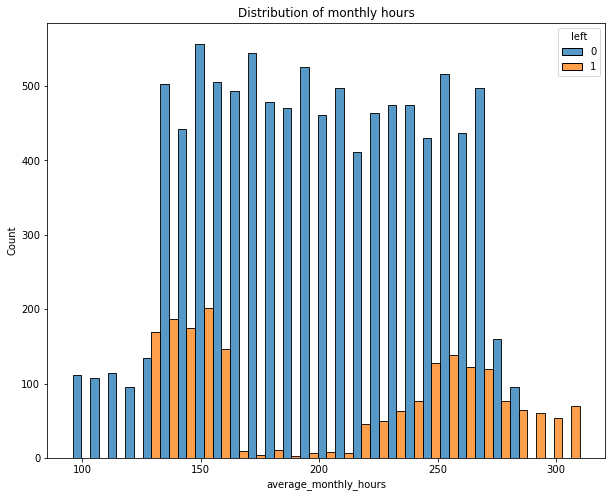

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data=df1, x='average_monthly_hours', hue='left', multiple='dodge')
plt.title('Distribution of monthly hours')

Employees who left the company tend to lie on the upper and lower extremes of average monthly hours worked. Again, this could indicate that employees who planned to leave were assigned a lighter workload. Additionally, employees with a heavier workload had a tendency to leave the company.

Text(0.5, 1.0, 'Distribution of tenure')

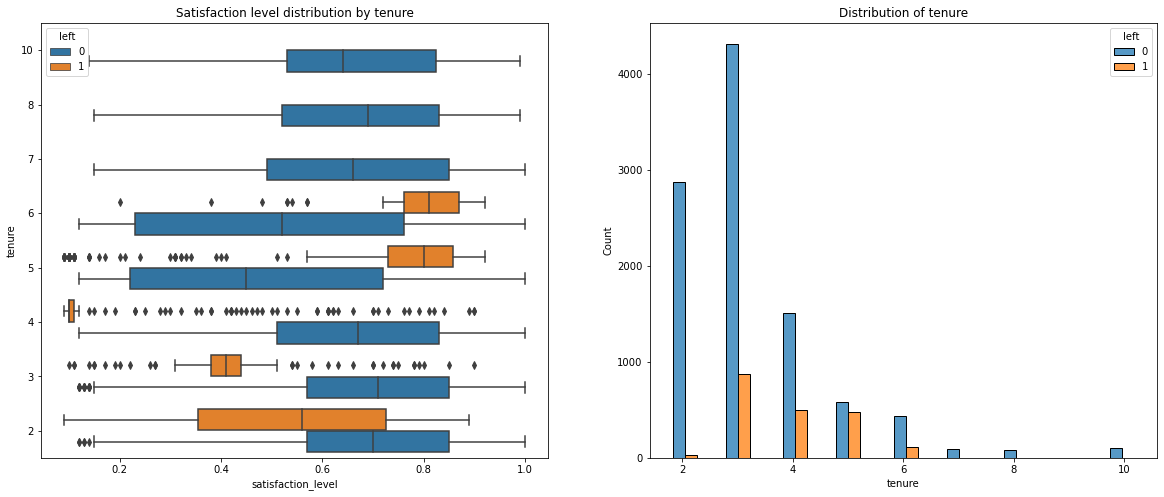

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level distribution by tenure')

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Distribution of tenure')

Employees with longe tenures that left the company tended to have higher satisfaction levels. For employees with 4 or less years at the company, the satisfaction level was lower for employees who left. Most employees have worked with the company between 2 to 4 years, and few employees have stayed for longer than 6 years. At the 4 years of working for the company, employee satisfaction for those who left is extremely low. This could indicate a point in which employees who are unhappy with the company feel the most dissatisfied and decide to no longer stay with the company.

Text(0.5, 1.0, 'Distribution of satisfaction')

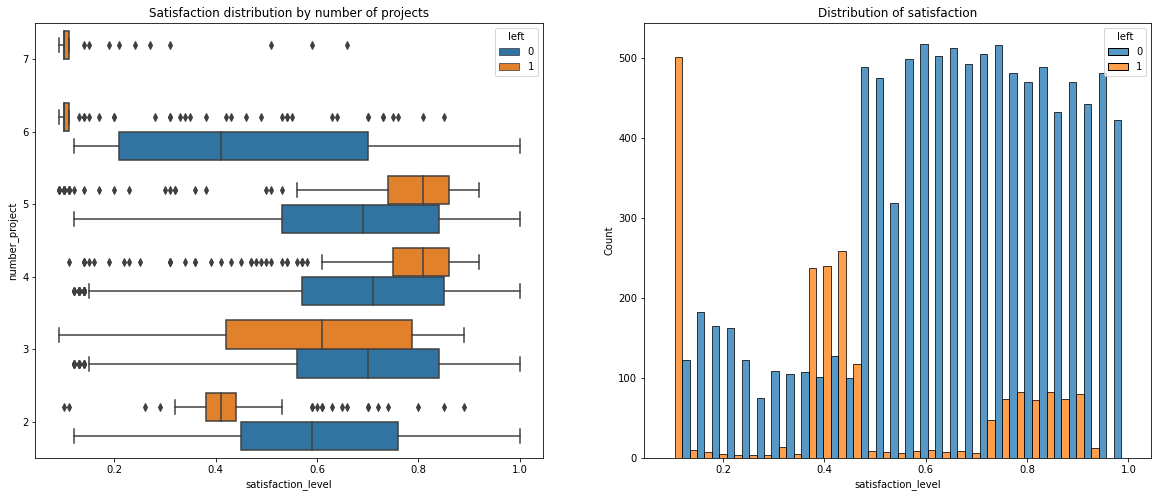

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x='satisfaction_level', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction distribution by number of projects')

sns.histplot(data=df1, x='satisfaction_level', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of satisfaction')

A large number of employees who left rated their satisfaction at the company on the lower end compared to employees who did not leave. Out of the employees who worked on 6 and 7 projects and left the company, employee satisfcation was extremely low. This could indicate that being assigned many projects is related to low satisfaction, which might result in the employee leaving the company.

Text(0.5, 1.0, 'Salary of people who stayed vs left')

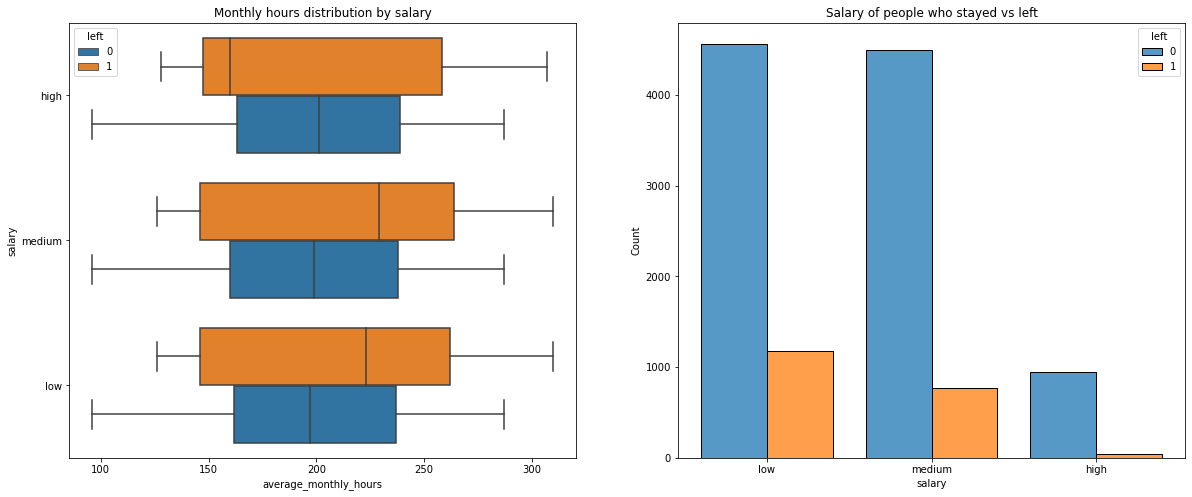

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(data=df1, x='average_monthly_hours', y='salary', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours distribution by salary')

sns.histplot(data=df1, x='salary', hue='left', multiple='dodge', ax=ax[1], shrink=0.8)
ax[1].set_title('Salary of people who stayed vs left')

For low and medium salary classes, employees who left worked more monthly hours on average. Also, most of the employees at the company earn low and medium salaries. Employees with high salaries that left the company were assigned hours as they prepared to leave.

Text(0.5, 1.0, 'Employees who stayed vs left by department')

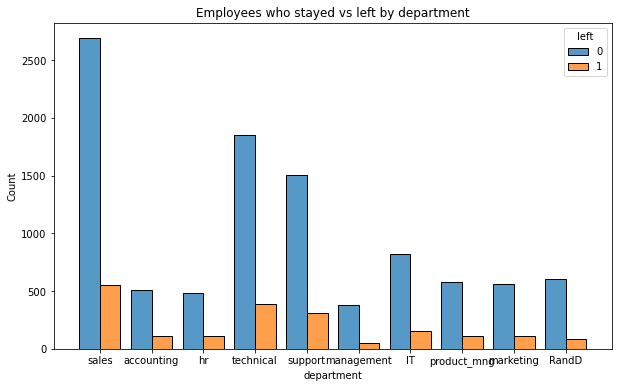

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.8)
plt.title('Employees who stayed vs left by department')

Text(0.5, 1.0, 'Scatterplot of monthly hours and satisfaction')

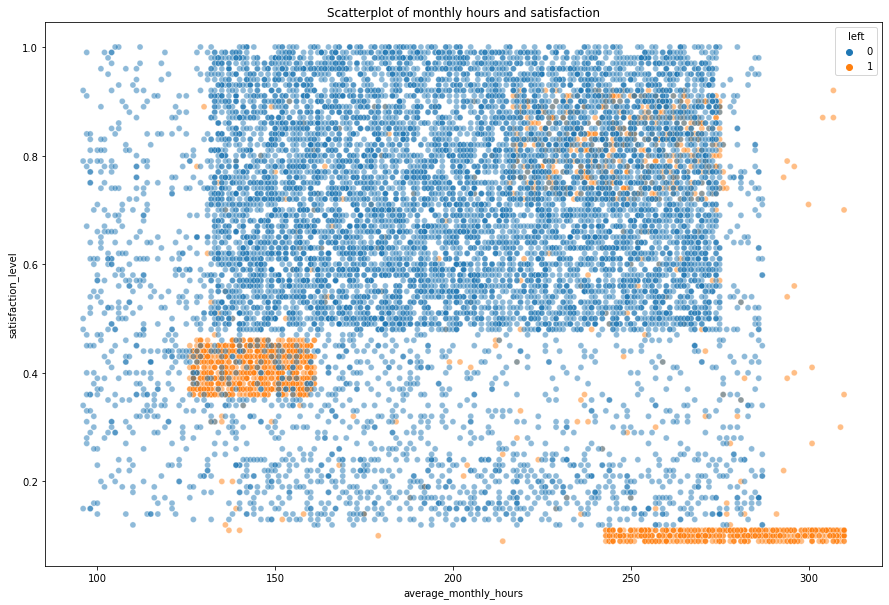

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.title('Scatterplot of monthly hours and satisfaction')

There are three main clusters of employees who left: high monthly hours + low satisfaction, low monthly hours + medium satisfaction, high monthly hours + high satisfaction.

Text(0.5, 1.0, 'Scatterplot of monthly hours and evaluation score')

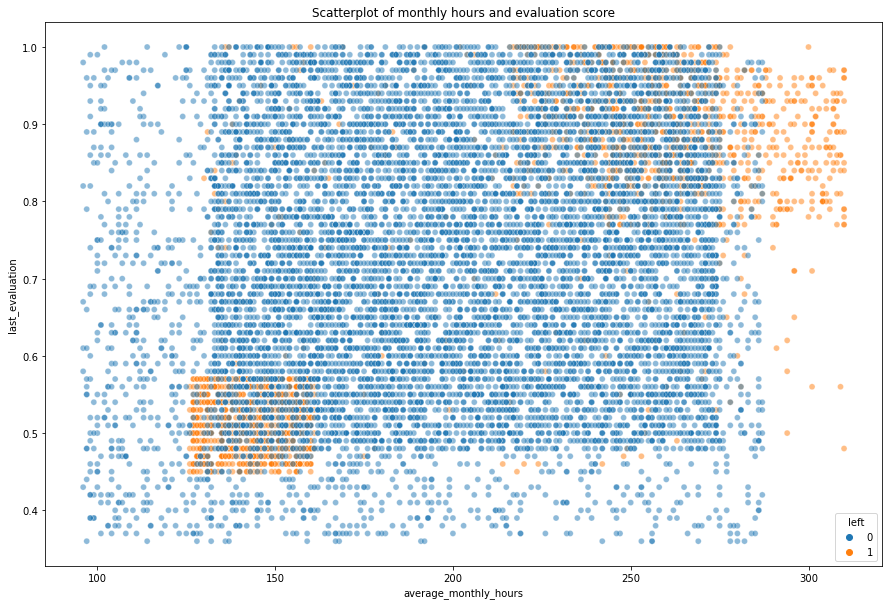

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.title('Scatterplot of monthly hours and evaluation score')

There are two clusters of employees who left: employees who earned high evaluation scores + worked longer hours, employees who earned average evaluation scores + worked fewer hours.

Text(0.5, 1.0, 'Scatterplot of monthly hours and promotion')

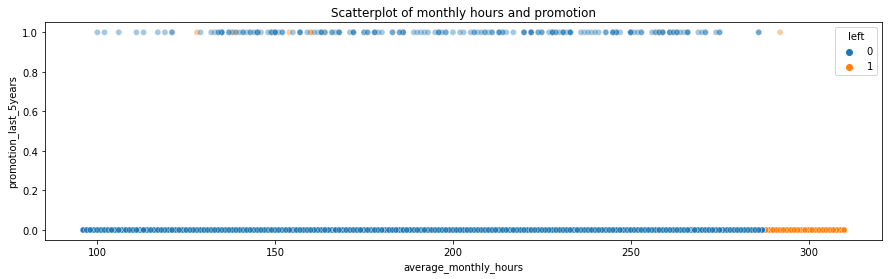

In [26]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.title('Scatterplot of monthly hours and promotion')

Most of the employees who worked longer hours and did not receive a promotion within the last 5 years left the company. This could indicate that the amount of hours spent working did not contribute to an increase in pay or position, which caused employeess to leave.

Text(0.5, 1.0, 'Employee salaries by tenure')

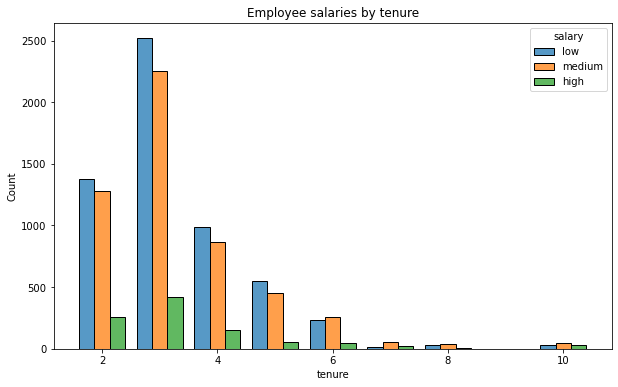

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='tenure', hue='salary', discrete=1, multiple='dodge', shrink=.8)
plt.title('Employee salaries by tenure')

Text(0.5, 1.0, 'Correlation heatmap')

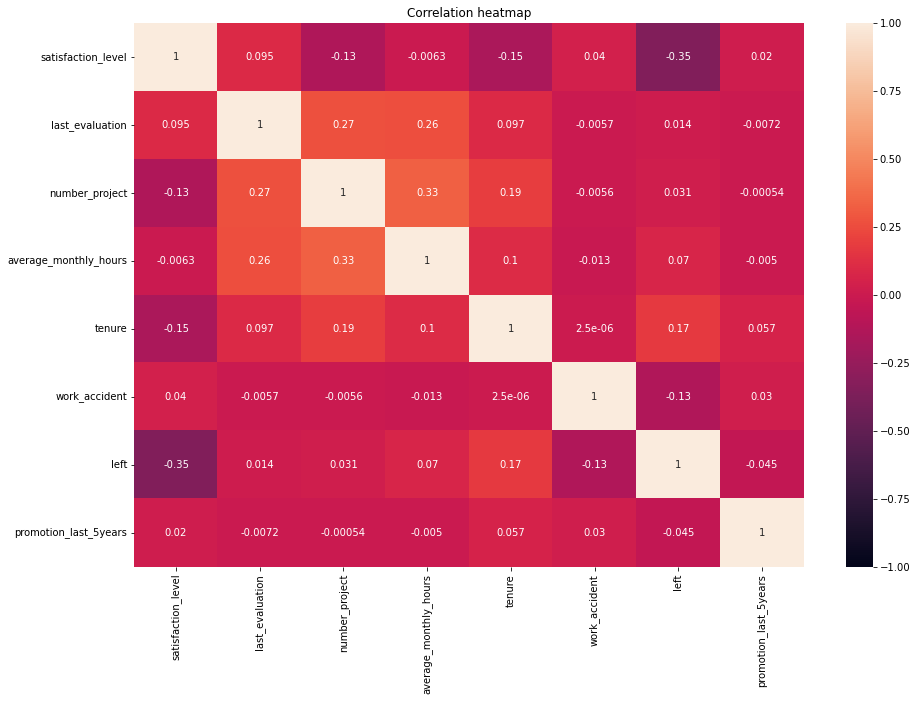

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation heatmap')

Evaluation score, average monthly hours, and number of projects are positively correlated with each other. Many of the employees who left had a low satisfaction level, which is negatively correlated with workload. This suggests that employees who work more are more dissatisfied and are likely ot leave the company.

### Insights

Employees who feel overworked, as seen in the average monthly hours and number of projects, may feel dissatisfed and tend to leave the company. There are few employees who have stayed with the company for longer than 6 years, with most of the employees only having worked at the company for 2 to 3 years. 

# Model Construction

The independent variables chosen are satisfaction, evaluation score, average monthly hours, tenure, and number of projects.

### Logistic Regression

In [41]:
df2 = df1.copy()
df2.loc[df2['tenure'] > q3 + 1.5*iqr, 'tenure'] = q3 + 1.5*iqr

In [42]:
data_majority = df2[df2['left'] == 0]
data_minority = df2[df2['left'] == 1]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=0)

df3 = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

print(df3['left'].value_counts())

0    10000
1    10000
Name: left, dtype: int64


In [107]:
### YOUR CODE HERE ###
X = df3.drop(['left'], axis=1)
y = df3['left']

In [108]:
X['salary'] = (
    X['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
X = pd.get_dummies(X, drop_first=False)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.58,0.74,4,215,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.82,0.67,2,202,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.45,0.69,5,193,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.78,0.82,5,247,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.49,0.60,3,214,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)

In [110]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14000, 18) (6000, 18) (14000,) (6000,)


In [111]:
clf = LogisticRegression(random_state=0, max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred = clf.predict(X_test)

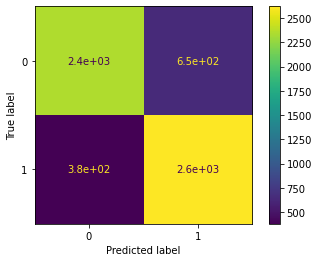

In [113]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

In [114]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.828833
Precision: 0.801590
Recall: 0.874000
F1 Score: 0.836230


In [115]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.78      0.82      3000
    Predicted would leave       0.80      0.87      0.84      3000

                 accuracy                           0.83      6000
                macro avg       0.83      0.83      0.83      6000
             weighted avg       0.83      0.83      0.83      6000



### Decision Tree

In [116]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 4, 6],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [117]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 4.01 s, sys: 0 ns, total: 4.01 s
Wall time: 4 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 4, 6],
                

In [118]:
print(tree1.best_params_)
print(tree1.best_score_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9768684940101996


In [119]:
cv_results = pd.DataFrame(tree1.cv_results_)


best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]


auc = best_estimator_results.mean_test_roc_auc
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

print("AUC Score:", "%.6f" % auc)
print("F1 Score:", "%.6f" % f1)
print("Recall:", "%.6f" % recall)
print("Precision:", "%.6f" % precision)
print("Accuracy:", "%.6f" % accuracy)

AUC Score: 0.985901
F1 Score: 0.976868
Recall: 0.983429
Precision: 0.970408
Accuracy: 0.976714


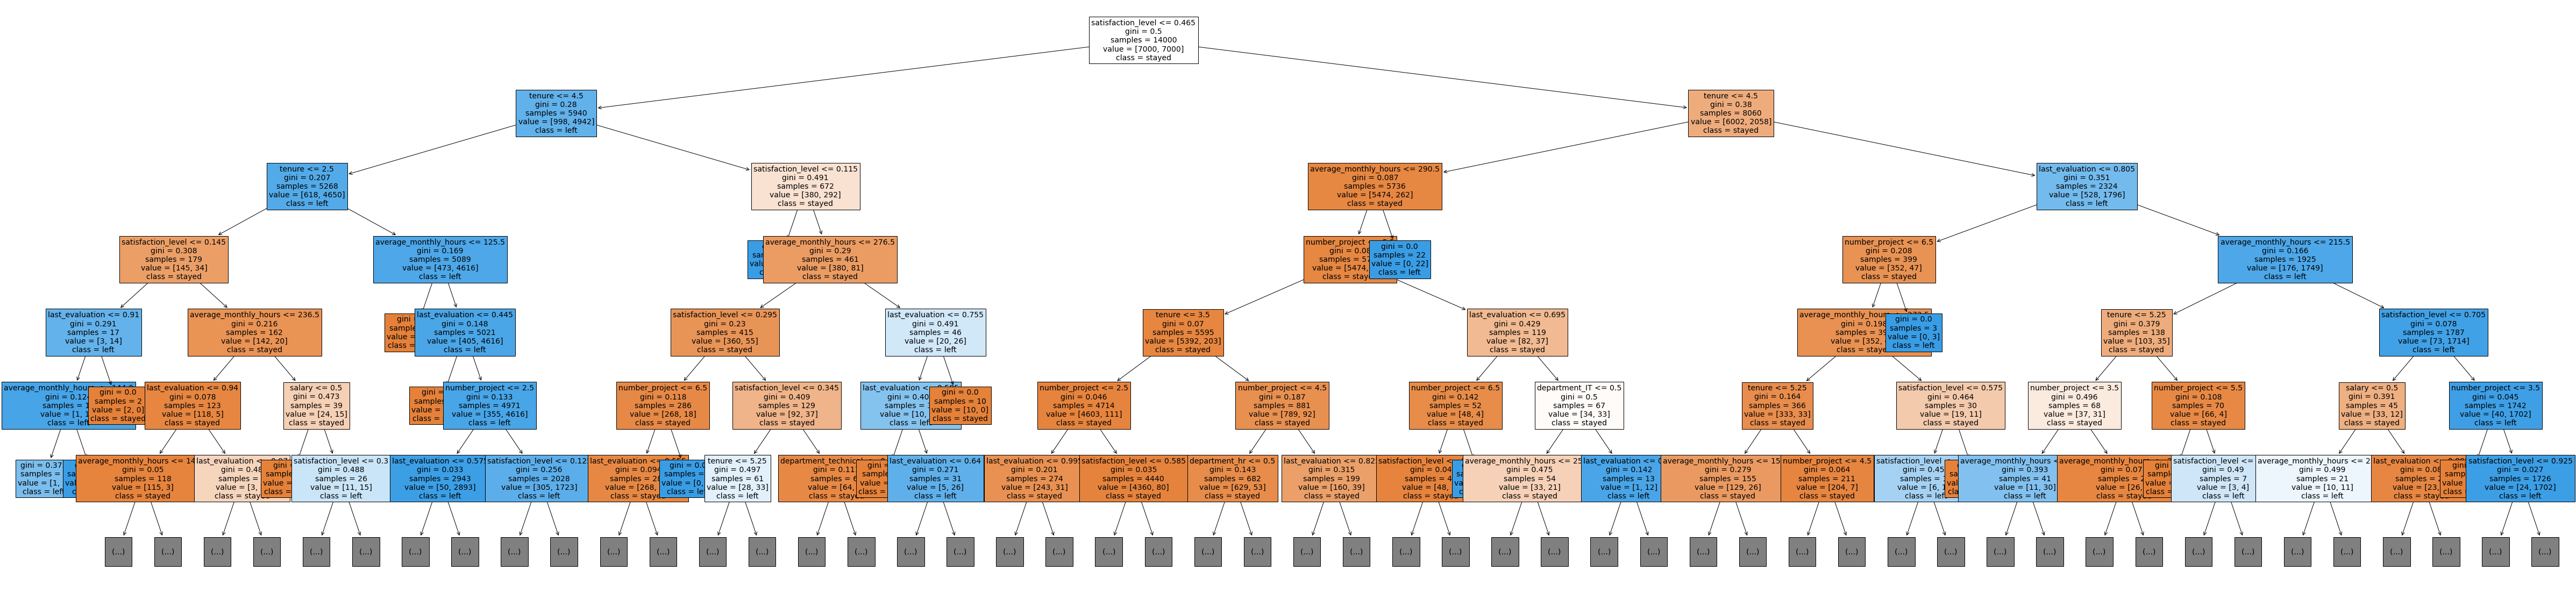

In [120]:
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [121]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)
tree1_importances

,gini_importance
satisfaction_level,0.440273
tenure,0.319681
last_evaluation,0.110495
average_monthly_hours,0.083206
number_project,0.025193
salary,0.005924
department_IT,0.002852
department_technical,0.002466
department_support,0.002006
department_RandD,0.001725


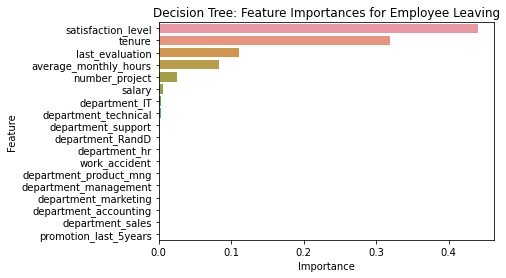

In [122]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# Results and Evaluation

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 83%, recall of 83%, f1-score of 83% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

The decision tree model achieved AUC of 98.6%, precision of 97.0%, recall of 98.3%, f1-score of 97.7%, and accuracy of 97.7%, on the test set.

### Conclusion, Recommendations, Next Steps

The model and feature importances supports that employees at the company are dissatisfied because of factors related to workload. To increase employee retention, it is recommended that employees be assigned fewer projects and lighter workloads to allow for decreased working hours. If decreased workload is not possible, employees should be incentivized and rewarded such as through higher pay or promotions. Additionally, higher evaluation score seems tied to working overtime, which should not be the case as employees who worked an appropriate number of hours should be rewarded accordingly as well. It is also worth looking into why employees who left after four years have an abnormally low satisfaction level.